In [2]:
import pandas as pd
filename = '/users/p00012387/SMUMSDS2016/data/Indicators.csv'
df_indicators = pd.read_csv(filename) # read in the csv file
df_indicators.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
CountryName      object
CountryCode      object
IndicatorName    object
IndicatorCode    object
Year             int64
Value            float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [3]:
df_flt = df_indicators[df_indicators.IndicatorCode.isin(['SL.TLF.CACT.MA.ZS','NY.GDP.MKTP.CD','NY.GDP.PCAP.CD','SP.ADO.TFRT'
                                                 ,'SG.GEN.PARL.ZS'])]
df_s = df_flt[['Year','CountryCode','IndicatorCode','Value']]
df_s =df_s.pivot_table(index=['CountryCode','Year'], columns=['IndicatorCode'], values=['Value'])


In [4]:
df_all = df_s['Value']

In [5]:
df_all.reset_index(inplace=True)
df_all.columns.name=None

## Global Dataframe

In [6]:
df_all

,CountryCode,Year,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,SG.GEN.PARL.ZS,SL.TLF.CACT.MA.ZS,SP.ADO.TFRT
0,ABW,1960,NaN,NaN,NaN,NaN,106.2062
1,ABW,1961,NaN,NaN,NaN,NaN,102.8116
2,ABW,1962,NaN,NaN,NaN,NaN,99.4170
3,ABW,1963,NaN,NaN,NaN,NaN,94.4542
4,ABW,1964,NaN,NaN,NaN,NaN,89.4914
5,ABW,1965,NaN,NaN,NaN,NaN,84.5286
6,ABW,1966,NaN,NaN,NaN,NaN,79.5658
7,ABW,1967,NaN,NaN,NaN,NaN,74.6030
8,ABW,1968,NaN,NaN,NaN,NaN,71.6650
9,ABW,1969,NaN,NaN,NaN,NaN,68.7270


In [7]:
import scipy

In [8]:
df_us = df_all[df_all['CountryCode']=='USA']
df_ch = df_all[df_all['CountryCode']=='CHN']
df_ru = df_all[df_all['CountryCode']=='RUS']

In [9]:
df_us

,CountryCode,Year,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,SG.GEN.PARL.ZS,SL.TLF.CACT.MA.ZS,SP.ADO.TFRT
12338,USA,1960,5.433000e+11,3007.123445,NaN,NaN,84.9872
12339,USA,1961,5.633000e+11,3066.562869,NaN,NaN,82.7346
12340,USA,1962,6.051000e+11,3243.843078,NaN,NaN,80.4820
12341,USA,1963,6.386000e+11,3374.515171,NaN,NaN,77.9506
12342,USA,1964,6.858000e+11,3573.941185,NaN,NaN,75.4192
12343,USA,1965,7.437000e+11,3827.527110,NaN,NaN,72.8878
12344,USA,1966,8.150000e+11,4146.316646,NaN,NaN,70.3564
12345,USA,1967,8.617000e+11,4336.426587,NaN,NaN,67.8250
12346,USA,1968,9.425000e+11,4695.923390,NaN,NaN,66.4660
12347,USA,1969,1.019900e+12,5032.144743,NaN,NaN,65.1070


### missing data
Since these are trends we used scipy interpolation with barycentric method. The pandas method to interpolate is not working backward so we applied the same method by reversing the index.

In [10]:
df_us =df_us.reindex(index=df_us.index[::-1])
df_us.interpolate(method='barycentric',order=1, limit_direction='both', inplace=True)
df_us =df_us.reindex(index=df_us.index[::-1])
df_us.interpolate(method='spline',order=1, limit_direction='both', inplace=True)
df_us

/Users/p00012387/anaconda/lib/python2.7/site-packages/scipy/interpolate/fitpack2.py:222: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


,CountryCode,Year,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,SG.GEN.PARL.ZS,SL.TLF.CACT.MA.ZS,SP.ADO.TFRT
12338,USA,1960,5.433000e+11,3007.123445,2.958168e+06,73.267328,84.987200
12339,USA,1961,5.633000e+11,3066.562869,2.923120e+06,73.281522,82.734600
12340,USA,1962,6.051000e+11,3243.843078,2.886483e+06,73.296416,80.482000
12341,USA,1963,6.386000e+11,3374.515171,2.848145e+06,73.312065,77.950600
12342,USA,1964,6.858000e+11,3573.941185,2.807986e+06,73.328528,75.419200
12343,USA,1965,7.437000e+11,3827.527110,2.765872e+06,73.345870,72.887800
12344,USA,1966,8.150000e+11,4146.316646,2.721656e+06,73.364165,70.356400
12345,USA,1967,8.617000e+11,4336.426587,2.675177e+06,73.383493,67.825000
12346,USA,1968,9.425000e+11,4695.923390,2.626256e+06,73.403947,66.466000
12347,USA,1969,1.019900e+12,5032.144743,2.574695e+06,73.425627,65.107000


In [11]:
df_ru =df_ru.reindex(index=df_ru.index[::-1])
df_ru.interpolate(method='barycentric',order=1, limit_direction='both', inplace=True)
df_ru =df_ru.reindex(index=df_ru.index[::-1])
df_ru.interpolate(method='spline',order=1, limit_direction='both', inplace=True)
df_ru

,CountryCode,Year,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,SG.GEN.PARL.ZS,SL.TLF.CACT.MA.ZS,SP.ADO.TFRT
10109,RUS,1960,4.888374e+11,3295.670857,-1.604743e+07,77.682743,27.851800
10110,RUS,1961,4.889724e+11,3296.612878,-1.584694e+07,77.668630,28.134400
10111,RUS,1962,4.891142e+11,3297.602879,-1.563758e+07,77.653760,28.417000
10112,RUS,1963,4.892635e+11,3298.644725,-1.541875e+07,77.638072,28.036400
10113,RUS,1964,4.894208e+11,3299.742723,-1.518980e+07,77.621493,27.655800
10114,RUS,1965,4.895868e+11,3300.901683,-1.495001e+07,77.603947,27.275200
10115,RUS,1966,4.897623e+11,3302.127007,-1.469860e+07,77.585344,26.894600
10116,RUS,1967,4.899481e+11,3303.424779,-1.443469e+07,77.565585,26.514000
10117,RUS,1968,4.901453e+11,3304.801885,-1.415734e+07,77.544557,27.636600
10118,RUS,1969,4.903548e+11,3306.266156,-1.386549e+07,77.522134,28.759200


In [12]:
df_ch =df_ch.reindex(index=df_ch.index[::-1])
df_ch.interpolate(method='barycentric',order=1, limit_direction='both', inplace=True)
df_ch =df_ch.reindex(index=df_ch.index[::-1])
df_ch.interpolate(method='spline',order=1, limit_direction='both', inplace=True)
df_ch

,CountryCode,Year,NY.GDP.MKTP.CD,NY.GDP.PCAP.CD,SG.GEN.PARL.ZS,SL.TLF.CACT.MA.ZS,SP.ADO.TFRT
2056,CHN,1960,5.918412e+10,88.722498,2.189129e+06,84.274481,68.033200
2057,CHN,1961,4.955705e+10,75.048915,2.164370e+06,84.278975,66.605600
2058,CHN,1962,4.668518e+10,70.122082,2.138468e+06,84.283691,65.178000
2059,CHN,1963,5.009730e+10,73.420392,2.111340e+06,84.288647,62.479400
2060,CHN,1964,5.906225e+10,84.573397,2.082899e+06,84.293861,59.780800
2061,CHN,1965,6.970915e+10,97.470100,2.053044e+06,84.299355,57.082200
2062,CHN,1966,7.587943e+10,103.181173,2.021667e+06,84.305151,54.383600
2063,CHN,1967,7.205703e+10,95.496691,1.988649e+06,84.311276,51.685000
2064,CHN,1968,6.999350e+10,90.371329,1.953856e+06,84.317758,47.352200
2065,CHN,1969,7.871882e+10,98.889885,1.917139e+06,84.324630,43.019400


In [13]:
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sanjay659', api_key='frygs895x4')

NameError: name 'plotly' is not defined

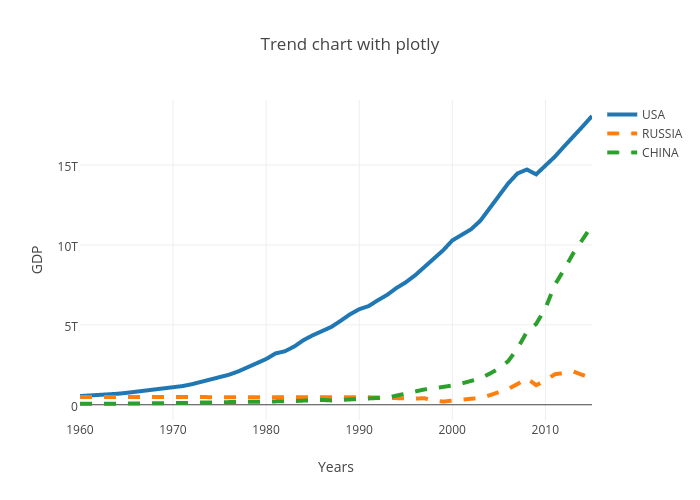

In [316]:
data = [
    go.Scatter(
    x=df_us['Year'], # assgin x as the 
    y=df_us['NY.GDP.MKTP.CD'],
    name='USA',
    line= dict(width=4)),    
    
    go.Scatter(
    x=df_ru['Year'],
    y=df_ru['NY.GDP.MKTP.CD'],
    name='RUSSIA',
    line= dict(width=4,dash='dash')),
        
    go.Scatter(
    x=df_ch['Year'],
    y=df_ch['NY.GDP.MKTP.CD'],
    name='CHINA',
    line= dict(width=4,dash='dash'))
    
]
layout = go.Layout(
    title='Trend chart with plotly',
    yaxis=dict(title='GDP'),
    xaxis=dict(title='Years')
)
fig= go.Figure(data=data, layout=layout)
url=py.iplot(fig, filename='pandas/WDI-GDP')
url

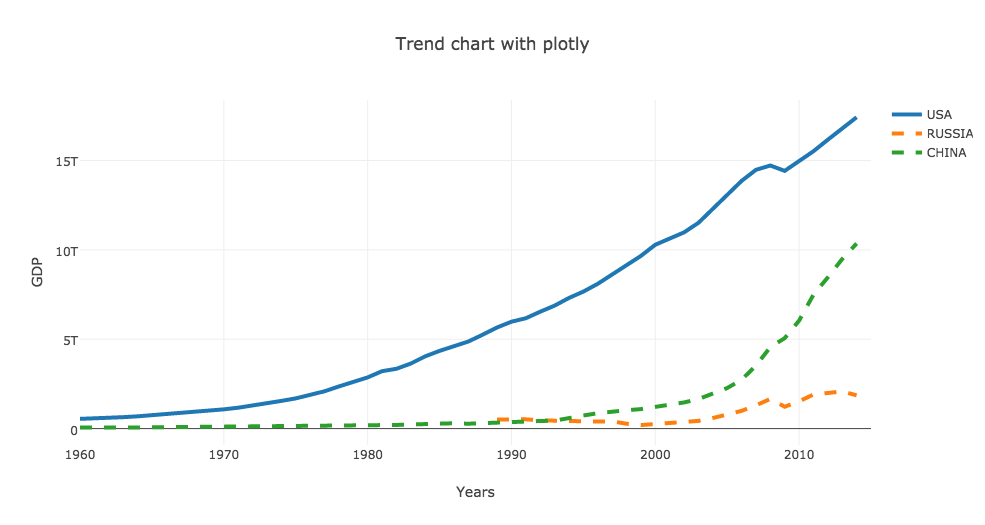

In [246]:
from IPython.display import Image 
Image(filename="images/basic-line-plot.png")

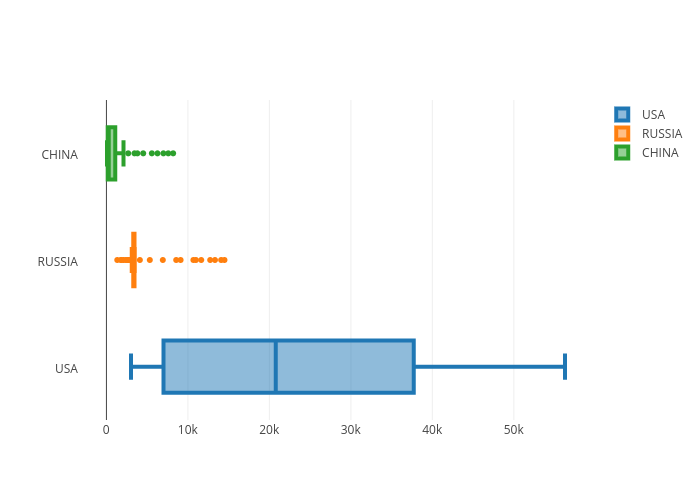

In [317]:
data = [
    go.Box(
    x=df_us['NY.GDP.PCAP.CD'],
    name='USA',
    line= dict(width=4)),    
    
    go.Box(
    x=df_ru['NY.GDP.PCAP.CD'],
    name='RUSSIA',
    line= dict(width=4,dash='dash')),
        
    go.Box(
    x=df_ch['NY.GDP.PCAP.CD'],
    name='CHINA',
    line= dict(width=4,dash='dash'))
    
]

fig= go.Figure(data=data)
url=py.iplot(fig, filename='pandas/WDI-GDP-Box')
url

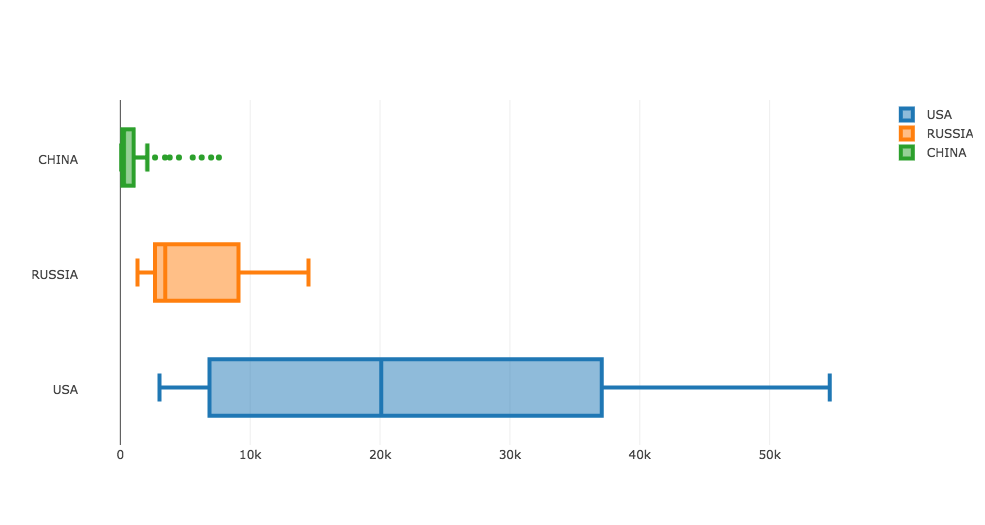

In [245]:
from IPython.display import Image 
Image(filename="images/WDI-GDP-Box.png")

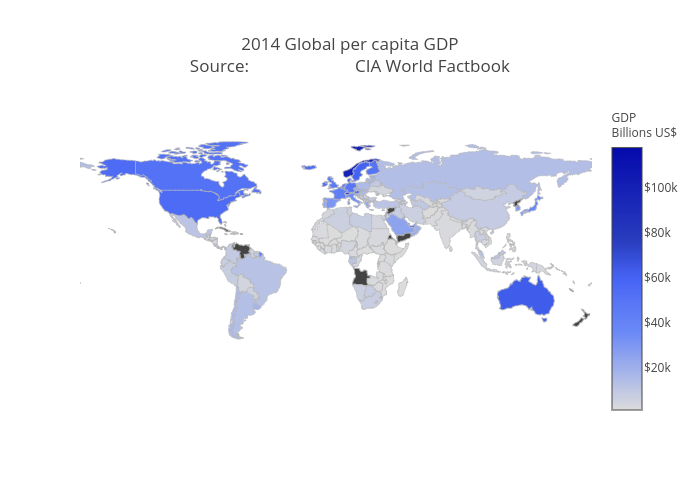

In [323]:

data = [ dict(
        type = 'choropleth',
        locations = df_14['CountryCode'],
        z = df_14['NY.GDP.PCAP.CD'],
        text = df_14['CountryCode'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '$',
            title = 'GDP<br>Billions US$'),
      ) ]

layout = dict(
    title = '2014 Global per capita GDP<br>Source:\
            <a href="https://www.cia.gov/library/publications/the-world-factbook/fields/2195.html">\
            CIA World Factbook</a>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
url =py.iplot( fig, validate=False, filename='pandas/d3-world-map' )
url

In [17]:
df_us_r = df_us.columns.drop('CountryCode')

In [22]:
df_us.drop('CountryCode',axis=1, inplace=True)

In [23]:
from plotly.tools import FigureFactory as FF

fig = FF.create_scatterplotmatrix(df_us, diag='box', index='Year',
                                  height=1000, width=1000)
url=py.iplot(fig, filename='pandas/scatter-plot-matrix')
url

This is the format of your plot grid:
[ (1,1) x1,y1 ]    [ (1,2) x2,y2 ]    [ (1,3) x3,y3 ]    [ (1,4) x4,y4 ]    [ (1,5) x5,y5 ]  
[ (2,1) x6,y6 ]    [ (2,2) x7,y7 ]    [ (2,3) x8,y8 ]    [ (2,4) x9,y9 ]    [ (2,5) x10,y10 ]
[ (3,1) x11,y11 ]  [ (3,2) x12,y12 ]  [ (3,3) x13,y13 ]  [ (3,4) x14,y14 ]  [ (3,5) x15,y15 ]
[ (4,1) x16,y16 ]  [ (4,2) x17,y17 ]  [ (4,3) x18,y18 ]  [ (4,4) x19,y19 ]  [ (4,5) x20,y20 ]
[ (5,1) x21,y21 ]  [ (5,2) x22,y22 ]  [ (5,3) x23,y23 ]  [ (5,4) x24,y24 ]  [ (5,5) x25,y25 ]



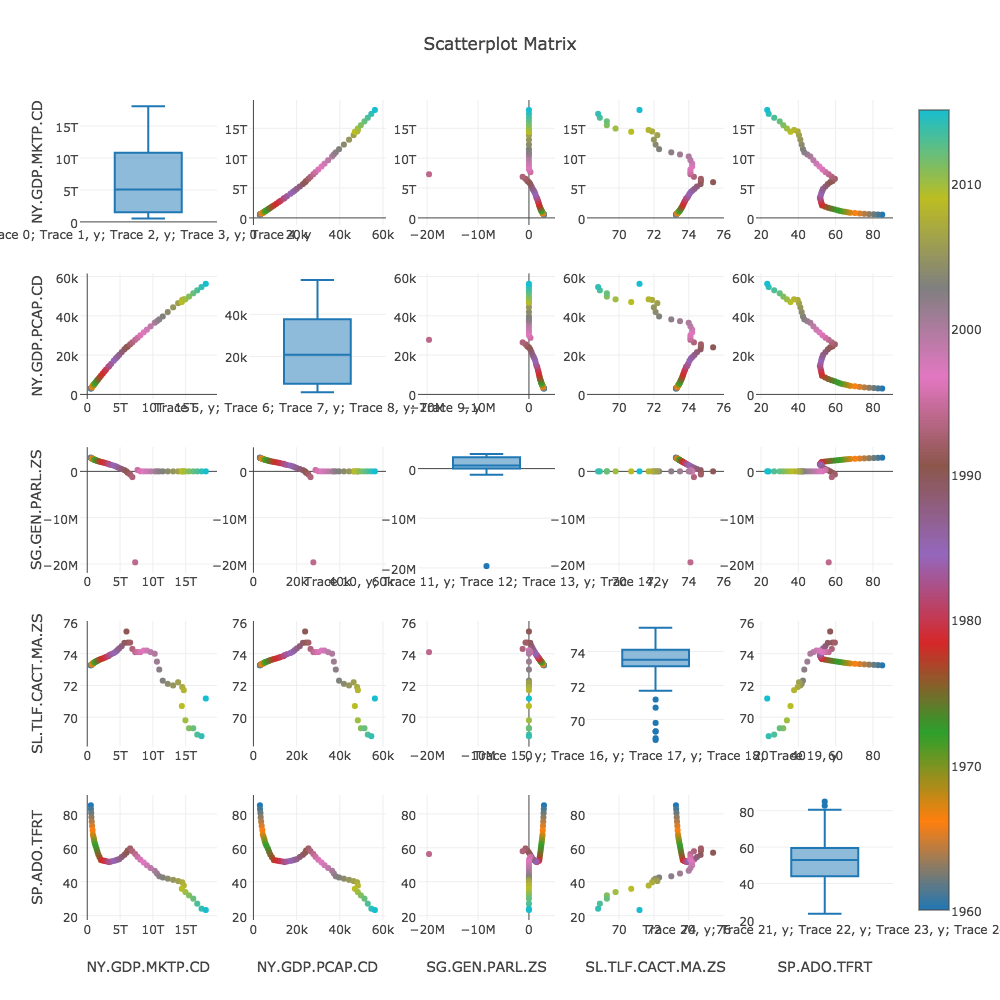

In [24]:
from IPython.display import Image 
Image(filename="images/scatter-plot-matrix.png")